## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how = 'left', on = "Mouse ID")

# Display the data table for preview
complete_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
complete_data['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [46]:
# Checking the number of mice.
complete_data['Mouse ID'].nunique()

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data.duplicated(subset = ['Mouse ID', 'Timepoint'])


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data.duplicated(subset = ['Mouse ID', 'Timepoint']).index


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892],
           dtype='int64', length=1893)

In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_cleaned = cleaned_data['Mouse ID'].shape[0]
num_of_mice_cleaned

1888

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_grouped = cleaned_data.groupby('Drug Regimen')
tumor_volume_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
tumor_volume_median = regimen_grouped['Tumor Volume (mm3)'].median()
tumor_volume_variance = regimen_grouped['Tumor Volume (mm3)'].var()
tumor_volume_std = regimen_grouped['Tumor Volume (mm3)'].std()
tumor_volume_sem = regimen_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean of Tumor Volume (mm3)':tumor_volume_mean,
                          'Median of Tumor Volume (mm3)':tumor_volume_median,
                          'Variance of Tumor Volume (mm3)':tumor_volume_variance,
                          'Standard Deviation of Tumor Volume (mm3)': tumor_volume_std,
                          'SEM of Tumor Volume (mm3)': tumor_volume_sem})
summary_df


,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_grouped['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints for All Mice Tested for Each Drug'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

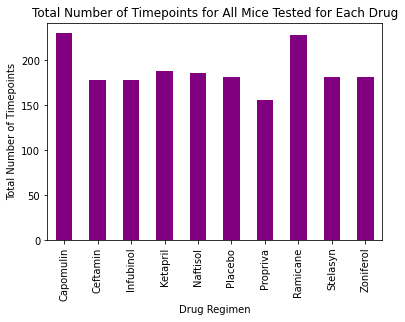

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_grouped.count()['Timepoint'].plot(kind = 'bar', ylabel = 'Total Number of Timepoints', title = 'Total Number of Timepoints for All Mice Tested for Each Drug', color = 'purple')


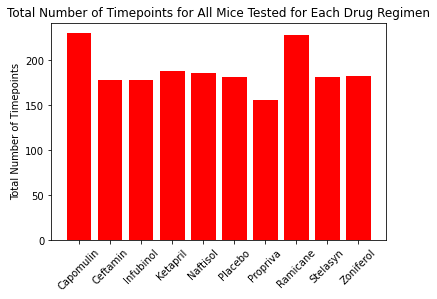

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
length = len(regimen_grouped.count()['Timepoint'].index)

plt.bar(regimen_grouped.count()['Timepoint'].index, regimen_grouped.count()['Timepoint'], color = 'r')
plt.ylabel('Total Number of Timepoints')
plt.title('Total Number of Timepoints for All Mice Tested for Each Drug Regimen')
plt.xticks([x for x in range(length)],regimen_grouped.count()['Timepoint'].index,rotation = 45)
plt.show()



<AxesSubplot:title={'center':'Distribution of Female vs. Male'}, ylabel='Sex'>

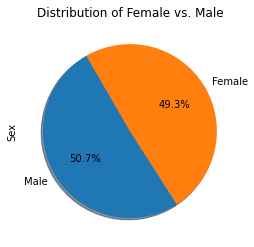

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_data['Sex'].value_counts().plot(kind = 'pie', title = 'Distribution of Female vs. Male', autopct='%1.1f%%', startangle = 120, shadow = True)


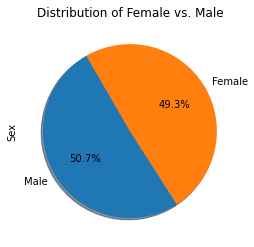

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(cleaned_data['Sex'].value_counts(), labels = cleaned_data['Sex'].unique(), autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('Distribution of Female vs. Male')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [57]:
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

mouse_id_grouped = cleaned_data.groupby('Mouse ID')
last_timepoint_df = mouse_id_grouped.max()
last_timepoint_df.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, cleaned_data, how = 'left', on = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)','Drug Regimen', 'Age_months','Weight (g)', 'Sex'])

tumor_volume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites_x,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,2.0
1,a251,Infubinol,Female,21,25,45,65.525743,1,1.0
2,a262,Placebo,Female,17,29,45,70.717621,4,4.0
3,a275,Ceftamin,Female,20,28,45,62.999356,3,3.0
4,a366,Stelasyn,Female,16,29,30,63.440686,1,1.0
...,...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0,0.0
245,z578,Ramicane,Male,11,16,45,45.000000,0,NaN
246,z581,Infubinol,Female,24,25,45,62.754451,3,3.0
247,z795,Naftisol,Female,13,29,45,65.741070,3,3.0


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
lowerq = []
upperq = []
counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_reg_rows = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == treatment]
    tumor_vol.append(drug_reg_rows)

    # Determine outliers using upper and lower bounds
    quartiles = drug_reg_rows['Tumor Volume (mm3)'].loc[drug_reg_rows['Drug Regimen'] == treatment].quantile([.25, .5, .75])
    lowerq.append(quartiles[0.25])
    upperq.append(quartiles[0.75])
    iqr = upperq[counter] - lowerq[counter]

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq - (1.5*iqr)

    print(f'{treatment} IQR:')
    print(f'The lower quartile of {treatment} is {lowerq[counter].round(2)}')
    print(f'The upper quartile of {treatment} is {upperq[counter].round(2)}')
    print(f'The interquartile range of {treatment} is {iqr.round(2)}')
    print(f'Values below {lower_bound[counter]} for {treatment} could be outliers.')
    print(f'Values above {upper_bound[counter]} for {treatment} could be outliers.')
    print(f'---------------------------------------------------------------')

    counter += 1


Capomulin IQR:
The lower quartile of Capomulin is 45.0
The upper quartile of Capomulin is 46.75
The interquartile range of Capomulin is 1.75
Values below 42.376491720000004 for Capomulin could be outliers.
Values above 44.12549724 for Capomulin could be outliers.
---------------------------------------------------------------
Ramicane IQR:
The lower quartile of Ramicane is 45.0
The upper quartile of Ramicane is 46.34
The interquartile range of Ramicane is 1.34
Values below 42.984251445 for Ramicane could be outliers.
Values above 44.328083815 for Ramicane could be outliers.
---------------------------------------------------------------
Infubinol IQR:
The lower quartile of Infubinol is 54.05
The upper quartile of Infubinol is 65.53
The interquartile range of Infubinol is 11.48
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 48.310040109999996 for Infubinol could be outliers.
---------------------------------------------------------------
Ceftamin IQR:
The l

<AxesSubplot:title={'center':'Final Tumor Volume Across Four Regimens of Interest'}, ylabel='Tumor Volume (mm3)'>

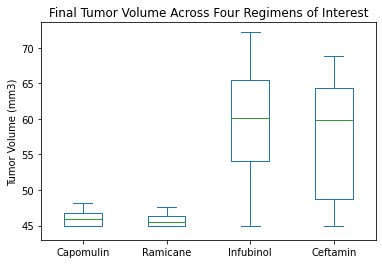

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = pd.DataFrame({treatments[0]:tumor_vol[0]['Tumor Volume (mm3)'],treatments[1]: tumor_vol[1]['Tumor Volume (mm3)'], treatments[2]:tumor_vol[2]['Tumor Volume (mm3)'], treatments[3]:tumor_vol[3]['Tumor Volume (mm3)']})
box_plot_data.plot(kind = 'box',ylim = 43, notch = 0, sym = 'gD', title = 'Final Tumor Volume Across Four Regimens of Interest', ylabel = 'Tumor Volume (mm3)')

## Line and Scatter Plots

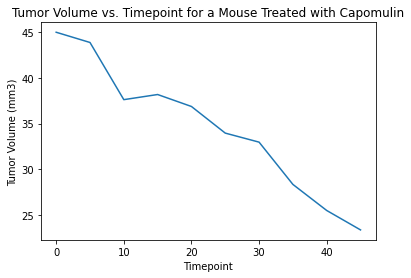

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = cleaned_data.loc[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 's185')]
plt.plot(line_df['Timepoint'],line_df['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Timepoint for a Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The linear regression equation is y = 1.1x + 21.03, The r-squared is: 0.43413546745981874


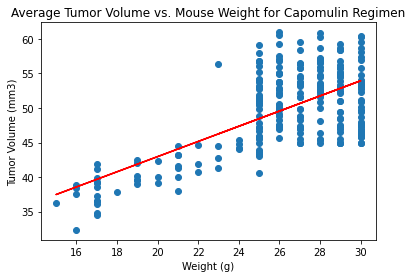

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = mouse_id_grouped.mean()
x_values = scatter_df['Weight (g)']
y_values = scatter_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
print(f"The r-squared is: {rvalue**2}")
plt.show()


## Correlation and Regression

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, volume)
print(f"The correlation between both factors is {round(correlation[0],2)}. \n The linear regression equation is {line_eq}.")

The correlation between both factors is 0.66. 
 The linear regression equation is y = 1.1x + 21.03.
